In [29]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df=pd.read_csv("C:/Users/cregg/Downloads/Titanic Dataset.csv") 

#The website you may need to obtain the dataset from: https://www.kaggle.com (#1)
#Decide which dataset you would like to use and why (#2)

#We all thought Titantic was a great and memorable movie. After searching through Kaggle we stumbled across
#a Titanic dataset that looks perfect for running through various machine learning models.

#Create a new ipynb file in your Jupiter notebook. (#3)
#Add codes to load the data into your project. (#4)

#The code to load the data into our project is just above.

In [30]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(df.isnull().sum())
print("\nFill N/A values in Age with the mean\n")
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

Fill N/A values in Age with the mean

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [31]:
df = pd.get_dummies(df, columns=['Sex']) #Convert M/F for "Sex" to dummy variables 1/0
df = df.drop(['Sex_female'], axis = 1) #Drop extra redundant column
df.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [32]:
#Transformation of the data (#10)

print("EDA Checking for sknewness/normality of the data\n")
print(df.skew(axis = 0, skipna = True), '\n') 
print("Fare has a relatively high value of 4.78 therefore we will adjust the data to correct for this.\n")
df.Fare = np.sqrt(df.Fare)
print(df.skew(axis = 0, skipna = True), '\n')
print("After adjusting the data we recieve a new value of 2.08 which is more reasonable.")

EDA Checking for sknewness/normality of the data

Survived    0.478523
Pclass     -0.630548
Age         0.434488
Fare        4.787317
Sex_male   -0.618921
dtype: float64 

Fare has a relatively high value of 4.78 therefore we will adjust the data to correct for this.

Survived    0.478523
Pclass     -0.630548
Age         0.434488
Fare        2.085004
Sex_male   -0.618921
dtype: float64 

After adjusting the data we recieve a new value of 2.08 which is more reasonable.


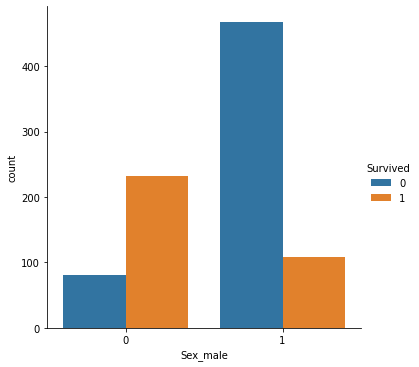

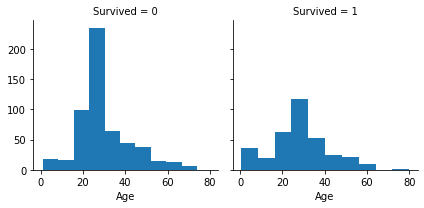

In [51]:
#Carefully evaluate which model works for your data set and clean or transform your data set
#(e.g. ScatterPlot, BoxPlot, Histogram/DensityPlot) (#6)

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Sex_male", "Survived"]].groupby(['Sex_male'], as_index=False).mean().sort_values(by='Survived', ascending=False)
 
sns.catplot(x ="Sex_male", hue ="Survived",
kind ="count", data = df)
survival_age = sns.FacetGrid(df, col='Survived')
survival_age.map(plt.hist, 'Age', bins=10)

In [47]:
#Split dataset into training and test dataset, use training dataset to create the model (#5)
#We wanted to set our target variable to whether they survived or not and then we split the data into training/testing
#with a 80/20 split
predictor = df.drop(["Survived"], axis=1)
target = df["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(predictor, target, test_size = 0.2, random_state = 0)

In [41]:
X_train.shape

(712, 4)

In [42]:
X_test.shape

(179, 4)

In [349]:
#Implement the models you select against your dataset. May need to go back and forth (#7)
#Run the diagnostic test on the model you created, predict the test dataset and get the performance (#8)
#Interpret the result and how you want to use your model (#9)

dtclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
dtclassifier.fit(X_train, Y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

dt_score = round((accuracy_score(y_pred, Y_test)*100), 2)
print('\nDecision Tree accuracy is:', dt_score, '%')

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[99 11]
 [21 48]]

Decision Tree accuracy is: 82.12 %


In [350]:
lrclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
lrclassifier.fit(X_train, Y_train)

y_pred = lrclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

lr_score = round((accuracy_score(y_pred, Y_test)*100), 2)
print('\nLogistic Regression accuracy is:', lr_score, '%')

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[92 18]
 [21 48]]

Logistic Regression accuracy is: 78.21 %


In [351]:
knclassifier = KNeighborsClassifier(n_neighbors=50)
knclassifier.fit(X_train, Y_train)

y_pred = knclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

kn_score = round((accuracy_score(y_pred, Y_test)*100), 2)
print('\nK Neighbors Classifier accuracy is:', kn_score, '%')

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       110
           1       0.84      0.45      0.58        69

    accuracy                           0.75       179
   macro avg       0.79      0.70      0.71       179
weighted avg       0.77      0.75      0.73       179

[[104   6]
 [ 38  31]]

K Neighbors Classifier accuracy is: 75.42 %


In [352]:
rfclassifier = RandomForestClassifier(max_leaf_nodes=10)
rfclassifier.fit(X_train, Y_train)

y_pred = rfclassifier.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

rf_score = round((accuracy_score(y_pred, Y_test)*100), 2)
print('\nRandom Forest accuracy is:', rf_score, '%')

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179

[[99 11]
 [23 46]]

Random Forest accuracy is: 81.01 %


In [353]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

y_pred = gaussian.predict(X_test)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

nb_score = round((accuracy_score(y_pred, Y_test)*100), 2)
print('\nGaussian Naive Bayes accuracy is:', nb_score, '%')

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

[[87 23]
 [15 54]]

Gaussian Naive Bayes accuracy is: 78.77 %


In [354]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 
              'KNeighbors', 'Random Forest', 'Gaussian Naive Bayes'],
    'Score': [dt_score, lr_score, kn_score, 
              rf_score, nb_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,82.12
3,Random Forest,81.01
4,Gaussian Naive Bayes,78.77
1,Logistic Regression,78.21
2,KNeighbors,75.42
